In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [8]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 88% 143M/163M [00:00<00:00, 210MB/s]
100% 163M/163M [00:00<00:00, 184MB/s]


In [9]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow #
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2172.jpg', 'with_mask_1882.jpg', 'with_mask_2006.jpg', 'with_mask_97.jpg', 'with_mask_3636.jpg']
['with_mask_763.jpg', 'with_mask_1698.jpg', 'with_mask_1272.jpg', 'with_mask_509.jpg', 'with_mask_2296.jpg']


In [12]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3341.jpg', 'without_mask_1907.jpg', 'without_mask_3083.jpg', 'without_mask_2094.jpg', 'without_mask_2152.jpg']
['without_mask_3593.jpg', 'without_mask_3145.jpg', 'without_mask_3398.jpg', 'without_mask_574.jpg', 'without_mask_3192.jpg']


In [13]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [15]:
# create the labels

with_mask_labels = [1]*3725 # It creates a list with value 1 of size 3725

without_mask_labels = [0]*3828 # It creates a list with value 0 of length 3828

In [16]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [19]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

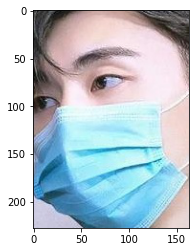

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

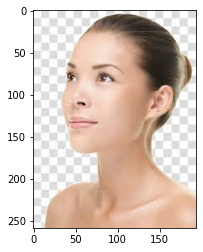

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [20]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

# We want to read all the image then do the resize ,convert into RGB and then convert into numpy array
for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
type(data)

list

In [24]:
len(data)

7553

array([[[146,  93,  43],
        [146,  93,  43],
        [148,  95,  45],
        ...,
        [161, 110,  63],
        [154, 106,  59],
        [151, 107,  60]],

       [[147,  94,  44],
        [147,  94,  44],
        [149,  96,  46],
        ...,
        [161, 110,  63],
        [156, 108,  61],
        [154, 110,  63]],

       [[147,  94,  44],
        [147,  94,  44],
        [149,  96,  46],
        ...,
        [161, 110,  63],
        [157, 110,  63],
        [158, 114,  66]],

       ...,

       [[ 31,  34,  25],
        [ 31,  34,  25],
        [ 30,  33,  24],
        ...,
        [178, 124,  77],
        [176, 122,  77],
        [175, 121,  77]],

       [[ 32,  34,  26],
        [ 32,  34,  25],
        [ 31,  33,  24],
        ...,
        [175, 121,  75],
        [175, 122,  75],
        [175, 122,  77]],

       [[ 34,  35,  27],
        [ 33,  34,  26],
        [ 32,  33,  25],
        ...,
        [172, 118,  69],
        [173, 121,  73],
        [176, 125,  78]]], dtype=uint8)
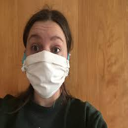

In [25]:
data[0]

In [26]:
type(data[0])

numpy.ndarray

In [27]:
data[0].shape

(128, 128, 3)

In [28]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[109, 107, 118],
        [114, 113, 121],
        [109, 107, 116],
        ...,
        [ 90,  97, 107],
        [ 90,  94, 105],
        [ 93,  97, 108]],

       [[110, 108, 119],
        [111, 108, 117],
        [110, 105, 114],
        ...,
        [ 86,  93, 103],
        [ 88,  92, 103],
        [ 89,  93, 104]],

       [[112, 107, 118],
        [113, 109, 118],
        [123, 117, 125],
        ...,
        [ 89,  95, 105],
        [ 91,  95, 106],
        [ 87,  91, 102]],

       ...,

       [[ 46,  66,  91],
        [ 45,  65,  90],
        [ 47,  67,  92],
        ...,
        [177, 143, 123],
        [176, 144, 123],
        [177, 145, 124]],

       [[ 49,  69,  93],
        [ 47,  67,  91],
        [ 46,  66,  90],
        ...,
        [179, 146, 126],
        [178, 146, 125],
        [177, 146, 125]],

       [[ 43,  63,  87],
        [ 43,  63,  87],
        [ 44,  64,  88],
        ...,
        [179, 147, 126],
        [177, 145, 124],
        [175, 144, 123]]

In [31]:
X_train_scaled[0]

array([[[0.95686275, 0.94901961, 0.90588235],
        [0.95294118, 0.94509804, 0.92156863],
        [0.96862745, 0.96470588, 0.96078431],
        ...,
        [0.96470588, 0.94901961, 0.95294118],
        [0.93333333, 0.9254902 , 0.93333333],
        [0.95294118, 0.94901961, 0.95686275]],

       [[0.94901961, 0.94509804, 0.92941176],
        [0.96862745, 0.97254902, 0.96862745],
        [0.90588235, 0.91764706, 0.92941176],
        ...,
        [0.69019608, 0.65490196, 0.6745098 ],
        [0.70196078, 0.65882353, 0.68627451],
        [0.71372549, 0.66666667, 0.69803922]],

       [[0.97254902, 0.97254902, 0.97647059],
        [0.94901961, 0.96078431, 0.97254902],
        [0.87058824, 0.89411765, 0.91372549],
        ...,
        [0.60784314, 0.58431373, 0.60784314],
        [0.62745098, 0.58039216, 0.61568627],
        [0.64705882, 0.58431373, 0.62745098]],

       ...,

       [[0.95294118, 0.93333333, 0.97254902],
        [0.94117647, 0.92941176, 0.96470588],
        [0.9372549 , 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 24ms/step - loss: 0.4838 - acc: 0.7973 - val_loss: 0.2686 - val_acc: 0.8777
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2943 - acc: 0.8862 - val_loss: 0.2378 - val_acc: 0.8926
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2292 - acc: 0.9112 - val_loss: 0.2052 - val_acc: 0.8959
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1982 - acc: 0.9237 - val_loss: 0.2472 - val_acc: 0.8926
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1758 - acc: 0.9331 - val_loss: 0.1819 - val_acc: 0.9157


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.1804 - acc: 0.9265
Test Accuracy = 0.9265387058258057


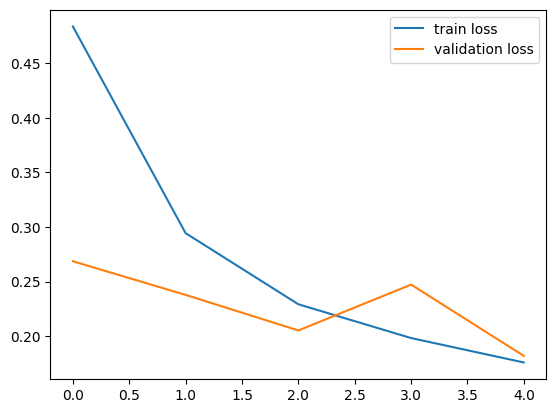

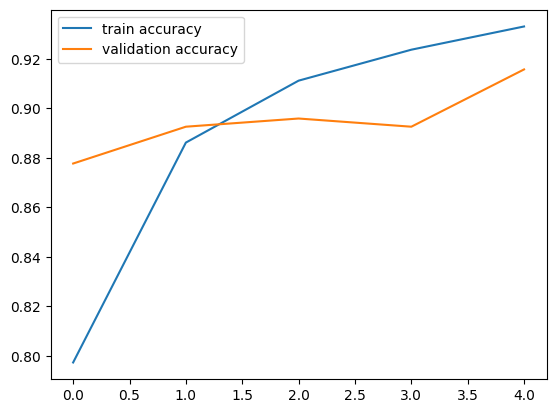

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_10.jpg


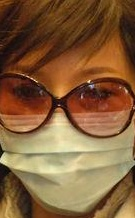

1/1 [==============================] - 0s 340ms/step
[[0.08777847 0.86017543]]
1
The person in the image is wearing a mask


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/with_mask/with_mask_1001.jpg


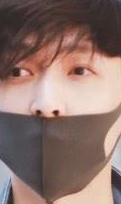

1/1 [==============================] - 0s 20ms/step
[[0.2862016 0.6118922]]
1
The person in the image is wearing a mask


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')